# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`

In [89]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [90]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [91]:
df_08.fuel.value_counts()

Gasoline    984
gas           1
ethanol       1
CNG           1
Name: fuel, dtype: int64

In [96]:
alt_08 = df_08.query("fuel in ['ethanol', 'CNG']").model.nunique()

In [97]:
alt_18 = df_18.query("fuel in ['Ethanol', 'Electricity']").model.nunique()
alt_18

26

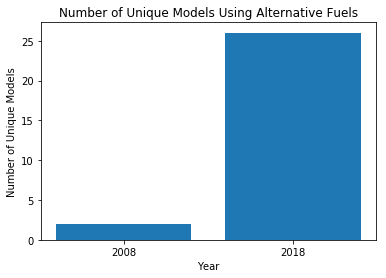

In [98]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Between 2008 and 2018, the number of unique models using alternative fuels increased by 24. Proportions are shown below:

In [99]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [105]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_diff = (prop_18 - prop_08) * 100
prop_08, prop_18, prop_diff

(0.005305039787798408, 0.07282913165266107, 6.7524091864862665)

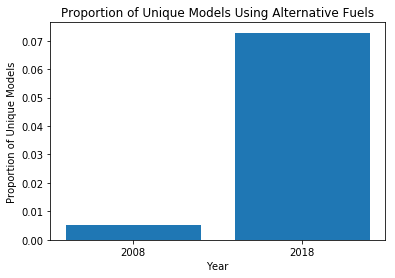

In [101]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

Between 2008 and 2018, the number of unique models using alternative fuels increased by 6.75%.

### Q2: How much have vehicle classes improved in fuel economy?  

In [109]:
mean_08 = df_08.groupby('veh_class').cmb_mpg.mean()
mean_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [110]:
mean_18 = df_18.groupby('veh_class').cmb_mpg.mean()
mean_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [111]:
df_mean_08_18 = mean_18 - mean_08
df_mean_08_18

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

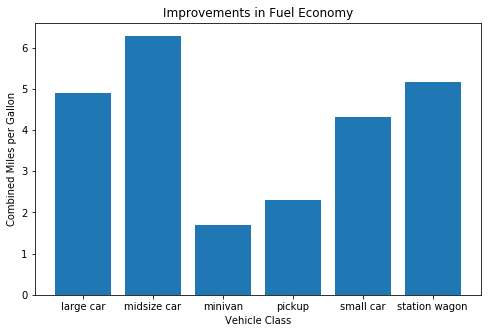

In [115]:
df_mean_08_18.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(df_mean_08_18.index, df_mean_08_18)
plt.title("Improvements in Fuel Economy")
plt.xlabel("Vehicle Class")
plt.ylabel("Combined Miles per Gallon");

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [122]:
df_08_sw = df_08.query("smartway == 'yes'")
df_18_sw = df_18.query("smartway == ['Yes','Elite']")

In [126]:
df_08_sw.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [127]:
df_18_sw.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [167]:
# Have they changed over time? (mpg, greenhouse gas)
df_sw_diff = df_18_sw.mean() - df_08_sw.mean()
df_sw_diff

displ                   -0.814932
cyl                     -0.891131
air_pollution_score     -2.152827
city_mpg                13.923197
hwy_mpg                 13.059064
cmb_mpg                 13.624269
greenhouse_gas_score     1.057505
dtype: float64

### Q4: What features are associated with better fuel economy?

In [165]:
top_08 = df_08.query("cmb_mpg > cmb_mpg.mean()")

In [166]:
btm_08 = df_08.query("cmb_mpg < cmb_mpg.mean()")

In [161]:
df_08_diff = top_08.mean() - btm_08.mean()
df_08_diff

displ                  -1.748844
cyl                    -2.387604
air_pollution_score     0.615595
city_mpg                6.183304
hwy_mpg                 7.517613
cmb_mpg                 6.757250
greenhouse_gas_score    3.043538
dtype: float64

In [163]:
top_18 = df_18.query("cmb_mpg > cmb_mpg.mean()")

In [164]:
btm_18 = df_18.query("cmb_mpg < cmb_mpg.mean()")

In [162]:
df_18_diff = top_18.mean() - btm_18.mean()
df_18_diff

displ                   -1.838250
cyl                     -2.423103
air_pollution_score      1.444009
city_mpg                10.109466
hwy_mpg                 11.027100
cmb_mpg                 10.534601
greenhouse_gas_score     2.607046
dtype: float64

Cars with better fuel economy generally have lower displacement and cylinders, and higher air pollution score and greenhouse gas score.